### Perceptron

Perceptron is a single layer neural network.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(88)

In [3]:
def get_training_examples():
    X1 = np.array([[8, 7], [4, 10], [9, 7], [7, 10], [9, 6], [4, 8], [10, 10]])
    y1 = np.ones(len(X1))
    X2 = np.array([[2, 7], [8, 3], [7, 5], [4, 4],  [4, 6], [1, 3], [2, 5]])
    y2 = np.ones(len(X2)) * -1
    return X1, y1, X2, y2

In [4]:
X1, y1, X2, y2= get_training_examples()
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

In [5]:
print(X)
print(y)
print( len(X), len(y))

[[ 8  7]
 [ 4 10]
 [ 9  7]
 [ 7 10]
 [ 9  6]
 [ 4  8]
 [10 10]
 [ 2  7]
 [ 8  3]
 [ 7  5]
 [ 4  4]
 [ 4  6]
 [ 1  3]
 [ 2  5]]
[ 1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1.]
14 14


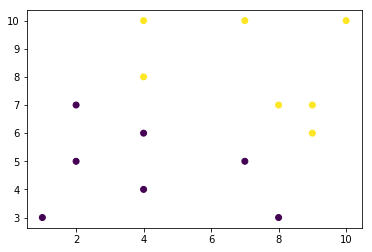

In [6]:
plt.scatter(X[:,0],X[:,1],marker='o', c=y) 
plt.show()

In [7]:
# add a column with value 1 at the first position.
Xa= np.c_[np.ones(X.shape[0]), X]
print(Xa)

[[ 1.  8.  7.]
 [ 1.  4. 10.]
 [ 1.  9.  7.]
 [ 1.  7. 10.]
 [ 1.  9.  6.]
 [ 1.  4.  8.]
 [ 1. 10. 10.]
 [ 1.  2.  7.]
 [ 1.  8.  3.]
 [ 1.  7.  5.]
 [ 1.  4.  4.]
 [ 1.  4.  6.]
 [ 1.  1.  3.]
 [ 1.  2.  5.]]


#### Hypothesis <br>
We have two class {+1, -1}. we need a function that predict either of the class for following criteria, <br>
h(x<sub>i</sub>)=+1 for w.x<sub>i</sub>>0 <br>
h(x<sub>i</sub>=-1 for w.x<sub>i</sub><0  <br>

we can calculate this nature using sign (or signum, not sin) function. which looks like the following

h(x<sub>i</sub>)=sign(w.x<sub>i</sub>)
<img src='sign.png' width=15%>

#### Perceptron
<img src='perceptron.png' width=50%>

In [8]:
#calculate weighted sum
def linear_regression(x,w):
    val=0
    for ix,iy in zip(x,w):
        val+=ix*iy
    return val

In [9]:
#decide -1 or 1
def activate(val):
    return np.sign(val)

In [10]:
def predict(X, w):
    hp=[]
    for x in X: 
        lr=linear_regression(x,w)
        h=activate(lr)
        hp.append(h)
    return hp

In [22]:
w = np.random.rand(3)
print(w)
py=predict(Xa,w)
print(py)

[0.82138087 0.08437771 0.92793076]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [23]:
def get_miss_indexes(py, y):
    miss=[]
    for i in range(len(y)):
        if py[i]!=y[i]:
            miss.append(i)
    return miss

In [24]:
miss=get_miss_indexes(py,y)
print(miss)
print('total miss classification=', len(miss), 'total=',len(y))

[7, 8, 9, 10, 11, 12, 13]
total miss classification= 7 total= 14


In [25]:
#choose randomly.
rnd=np.random.choice(miss)
print(rnd)
rx=Xa[rnd]
ry=y[rnd]
print(rx)
print(ry)

9
[1. 7. 5.]
-1.0


#### Perceptron Learning Algorithm
1. choose random hyperplane, classify training data
2. get the data missclassified
3. pick one from the missclassified randomly, say rx, ry
4. update hyperplane (weights, using update rule: w=w+eta \* (rx \* ry) , here, eta=learning rate )
5. classify training data using this updated hyperplane
5. repeate step 2-5 until all data are correctly classified

#### \*** Why it converge?

<img src='perceptron_learning_algorithm.png' width=30%>

In [26]:
def perceptron_train(X, y):
    w = np.random.rand(3)
    py=predict(X,w)
    miss=get_miss_indexes(py,y) 
    eta=0.1
    while len(miss)>0:
        rnd=np.random.choice(miss)
        rx=X[rnd]
        ry=y[rnd]
        w=w+eta*rx*ry
        
        py=predict(X,w)
        miss=get_miss_indexes(py,y)
        
    return w    

In [27]:
#a variation. using epoch and learning rate
def perceptron_train2(X, y):
    w = np.random.rand(3)
    py=predict(X,w)
    miss=get_miss_indexes(py,y) 
    eta=0.1
    epoch=50000
    for i in range(epoch):
        if len(miss)==0: #all data are classified.
            break
        rnd=np.random.choice(miss)
        rx=X[rnd]
        ry=y[rnd]
        w=w+eta*rx*ry
        
        py=predict(X,w)
        miss=get_miss_indexes(py,y)
        
    return w   

In [28]:
w=perceptron_train(Xa,y)
print(w)

[-6.49008311  0.26529721  0.69734934]


In [29]:
w=perceptron_train2(Xa,y)
print(w)

[-8.26301078  0.46259676  0.89599878]


In [30]:
py=predict(Xa,w)
print(py)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


#### Plotting the hyperplane.
hyperplane equation: ax+by+c=0 <br>
setting, x=0, y= -c/b <br>
setting, y=0, x= -c/a  <br>
so, hyperplane_x=[0, -c/a] <br>
    hyperplane_y=[-c/b, 0]

In [31]:
#calculating decision boundary line.
#from ax+by+c=0, setting x=0 and y=0 we get.
px=[0, -w[0]/w[1] ] #x=0, and x=value for y=0
print(px)
py=[ -w[0]/w[2], 0 ] #y= value for x=0, 0
print(py)

[0, 17.862232244456507]
[9.222122793354023, 0]


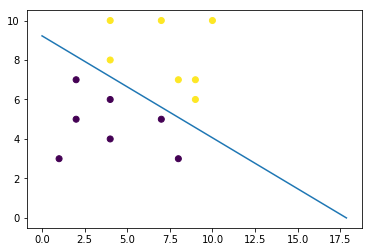

In [32]:
plt.scatter(X[:,0],X[:,1],marker='o', c=y)  
plt.plot(px, py )  
plt.show()

#### Refs.
1. https://zahidhasan.github.io/2017-09-10-perceptron/
2. svm-succinctly book
3. https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975